<a href="https://colab.research.google.com/github/girijeshcse/car_finder/blob/sushweta/Car_model_data_load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CAPSTONE PROJECT

1. Part 1 - Data load

In [1]:
import numpy as np
import scipy.io as sio 
import os
import cv2
from keras.applications.inception_v3 import InceptionV3
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Change the working directory

In [3]:
#### Add your code here ####
import os
os.chdir('/content/drive/My Drive/Capstone Data')

In [4]:
from zipfile import ZipFile

with ZipFile('Car Images.zip', 'r') as z:
  z.extractall()

image is 01887.jpg
original shape: 1067 1600
resized shape: 128 192


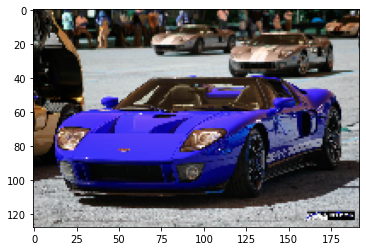

In [19]:
def peek_image(path, filename):
  
    im = cv2.imread(path + "/" + filename)
    print("image is", filename)
    name = filename.split('.')
    w, h, ch = im.shape
    print("original shape:" , w, h)
    h_resize = int(128*1.5)
    w_resize = 128
    im = cv2.resize(im,(h_resize,w_resize),interpolation=cv2.INTER_LINEAR)
    w, h, ch = im.shape
    print("resized shape:" , w, h)
    plt.imshow(im)

peek_image("Car Images/Train Images/Ford GT Coupe 2006/", "01887.jpg")   
labels = []

In [24]:
for dirname, _, filenames in os.walk(train_dir):
    print(dirname[train_len:])


Rolls-Royce Ghost Sedan 2012
Toyota 4Runner SUV 2012
Mercedes-Benz SL-Class Coupe 2009
Suzuki Aerio Sedan 2007
Scion xD Hatchback 2012
Tesla Model S Sedan 2012
Ram C-V Cargo Van Minivan 2012
Toyota Corolla Sedan 2012
Rolls-Royce Phantom Sedan 2012
Toyota Sequoia SUV 2012
Volvo 240 Sedan 1993
Rolls-Royce Phantom Drophead Coupe Convertible 2012
Toyota Camry Sedan 2012
MINI Cooper Roadster Convertible 2012
Volkswagen Beetle Hatchback 2012
Spyker C8 Coupe 2009
Spyker C8 Convertible 2009
Suzuki SX4 Hatchback 2012
Suzuki Kizashi Sedan 2012
Volvo C30 Hatchback 2012
Suzuki SX4 Sedan 2012
Volkswagen Golf Hatchback 2012
Volvo XC90 SUV 2007
smart fortwo Convertible 2012
Volkswagen Golf Hatchback 1991
McLaren MP4-12C Coupe 2012
Nissan Leaf Hatchback 2012
Mercedes-Benz Sprinter Van 2012
Lamborghini Reventon Coupe 2008
HUMMER H2 SUT Crew Cab 2009
HUMMER H3T Crew Cab 2010
Jeep Compass SUV 2012
Infiniti G Coupe IPL 2012
Jeep Grand Cherokee SUV 2012
Mitsubishi Lancer Sedan 2012
Jeep Liberty SUV 2012
L

In [32]:
import pandas as pd 
car_map = pd.read_csv('Car names and make.csv')
car_map=car_map.set_index('Cars')
car_map_dict=car_map.to_dict('index')

In [33]:
car_map_dict

{'AM General Hummer SUV 2000': {'Class Numbers': 0},
 'Acura Integra Type R 2001': {'Class Numbers': 5},
 'Acura RL Sedan 2012': {'Class Numbers': 1},
 'Acura TL Sedan 2012': {'Class Numbers': 2},
 'Acura TL Type-S 2008': {'Class Numbers': 3},
 'Acura TSX Sedan 2012': {'Class Numbers': 4},
 'Acura ZDX Hatchback 2012': {'Class Numbers': 6},
 'Aston Martin V8 Vantage Convertible 2012': {'Class Numbers': 7},
 'Aston Martin V8 Vantage Coupe 2012': {'Class Numbers': 8},
 'Aston Martin Virage Convertible 2012': {'Class Numbers': 9},
 'Aston Martin Virage Coupe 2012': {'Class Numbers': 10},
 'Audi 100 Sedan 1994': {'Class Numbers': 16},
 'Audi 100 Wagon 1994': {'Class Numbers': 17},
 'Audi A5 Coupe 2012': {'Class Numbers': 12},
 'Audi R8 Coupe 2012': {'Class Numbers': 14},
 'Audi RS 4 Convertible 2008': {'Class Numbers': 11},
 'Audi S4 Sedan 2007': {'Class Numbers': 23},
 'Audi S4 Sedan 2012': {'Class Numbers': 22},
 'Audi S5 Convertible 2012': {'Class Numbers': 20},
 'Audi S5 Coupe 2012': {'